In [70]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [55]:
deals= pd.read_csv('Sample_Data_Deals2.csv')
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderID        100 non-null    object
 1   OrderQuantity  100 non-null    int64 
 2   OrderValue     100 non-null    int64 
 3   Country        100 non-null    object
 4   Industry       100 non-null    object
 5   Deal Status    100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [56]:
deals.describe(include='O')

,OrderID,Country,Industry,Deal Status
count,100,100,100,100
unique,5,5,7,2
top,OD38231,Germany,Manufacturing,Won
freq,36,36,29,54


In [60]:
#Drop Order ID
deals1 = pd.DataFrame(deals.iloc[:,1:])
deals1.head()

,OrderQuantity,OrderValue,Country,Industry,Deal Status
0,371,383,Canada,Technology,Won
1,163,121,Canada,Finance,Won
2,191,117,Australia,Manufacturing,Lost
3,150,143,Australia,Manufacturing,Lost
4,165,148,Australia,Manufacturing,Lost


<Axes: xlabel='Deal Status', ylabel='count'>

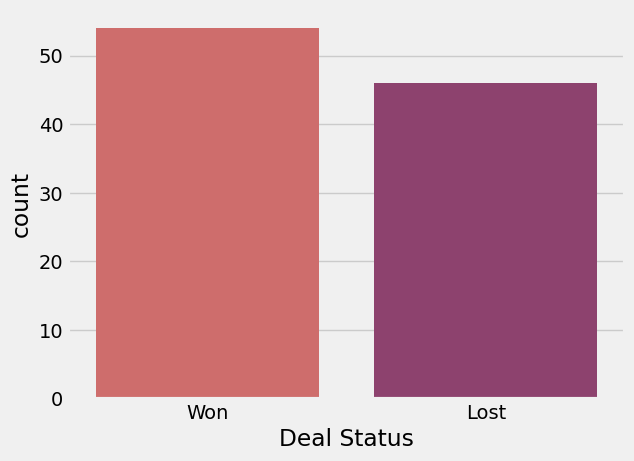

In [64]:
sns.countplot(x='Deal Status',data=deals1, hue='Deal Status', palette='flare') #Check if the dataset is well-balanced

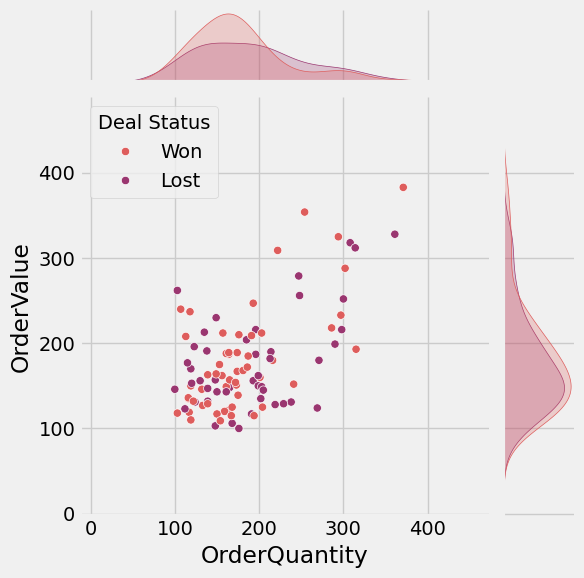

In [65]:
sns.jointplot(x='OrderQuantity', y='OrderValue', data=deals1, hue='Deal Status', palette='flare')

In [66]:
#Encoding categorical data, drop orderID
deals3 = pd.get_dummies(deals1, columns=['Country', 'Industry','Deal Status'], drop_first=True,dtype=int)
deals3.head()

,OrderQuantity,OrderValue,Country_Canada,Country_China,Country_France,Country_Germany,Industry_Finance,Industry_Government,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Technology,Deal Status_Won
0,371,383,1,0,0,0,0,0,0,0,0,1,1
1,163,121,1,0,0,0,1,0,0,0,0,0,1
2,191,117,0,0,0,0,0,0,0,1,0,0,0
3,150,143,0,0,0,0,0,0,0,1,0,0,0
4,165,148,0,0,0,0,0,0,0,1,0,0,0


In [73]:
#Create x and y datasets
X = deals3.drop('Deal Status_Won',axis=1).values
y = deals3['Deal Status_Won'].values

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [77]:
#Transform your data
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
X_train.shape

(75, 12)

In [80]:
X_test.shape

(25, 12)

In [102]:
# Define model
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) #prevents overfitting
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))  #prevents overfitting
#BINARY CLASSIFICATION USES SIGMOID ACTIVATION FUNCTION FOR OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))  #output layer
#Compile
model.compile(loss='binary_crossentropy', optimizer='adam')

#Model Fitting
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.6936 - val_loss: 0.7130
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6840 - val_loss: 0.7122
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7032 - val_loss: 0.7115
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7038 - val_loss: 0.7111
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7037 - val_loss: 0.7104
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7046 - val_loss: 0.7097
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7403 - val_loss: 0.7097
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6940 - val_loss: 0.7091
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6923 - val_loss: 0.7077
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6851 - val_loss: 0.7059
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6998 - val_loss: 0.7040
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7004 - val_l

<Axes: >

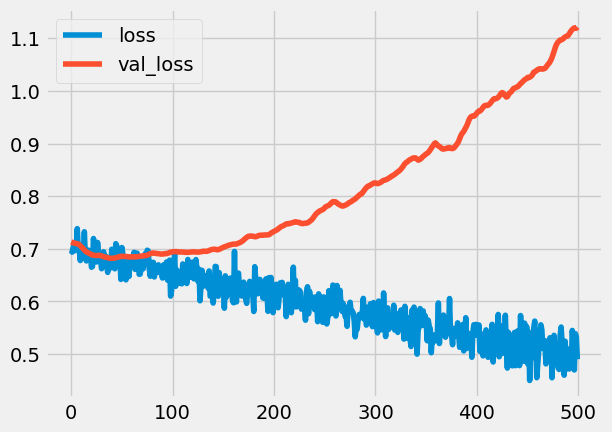

In [103]:
losses= pd.DataFrame(model.history.history)
losses.plot()

In [104]:
#Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [105]:
#Model fit WITH callbacks
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.5082 - val_loss: 1.1252
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5229 - val_loss: 1.1291
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5226 - val_loss: 1.1325
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5404 - val_loss: 1.1343
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5426 - val_loss: 1.1365
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5217 - val_loss: 1.1388
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4785 - val_loss: 1.1408
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5067 - val_loss: 1.1409
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5035 - val_loss: 1.1405
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5422 - val_loss: 1.1389
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4645 - val_loss: 1.1391
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.5191 - val_lo

<Axes: >

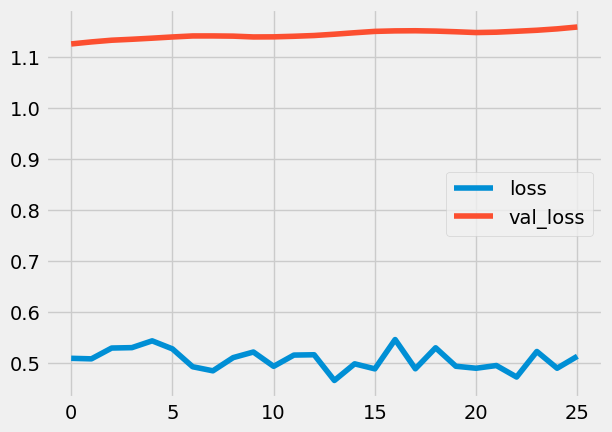

In [106]:
#Check val loss
losses2= pd.DataFrame(model.history.history)
losses2.plot()

In [113]:
predictions = model.predict(X_test)
classes_x=np.argmax(predictions,axis=1)
print(classes_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [114]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        11
           1       0.00      0.00      0.00        14

    accuracy                           0.44        25
   macro avg       0.22      0.50      0.31        25
weighted avg       0.19      0.44      0.27        25



C:\Users\neogi\Documents\Python_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neogi\Documents\Python_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neogi\Documents\Python_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
print(confusion_matrix(y_test,classes_x))

[[11  0]
 [14  0]]
